<a href="https://colab.research.google.com/github/AnirbanMukherjeeXD/california-housing-price/blob/master/California_Housing_NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


Importing Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Reading Training Dataset

In [0]:
dataset = pd.read_csv("sample_data/california_housing_train.csv")
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [0]:
plt.rcParams['figure.figsize'] = [300, 10]
plt.plot(X[X.columns[0]],Y)
plt.xlabel(X.columns[0]);
plt.ylabel('Price');

Designing Model

In [26]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


Compiling Model

In [0]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

Training Model

In [28]:
history = model.fit(X, Y, epochs=400, batch_size=50,  verbose=1, validation_split=0.2)

Train on 13600 samples, validate on 3400 samples
Epoch 1/400
13600/13600 [==============================] - 2s 154us/sample - loss: 49258127548.2353 - mse: 49258143744.0000 - mae: 192430.1719 - val_loss: 68719715328.0000 - val_mse: 68719706112.0000 - val_mae: 229558.2812
Epoch 2/400
13600/13600 [==============================] - 1s 89us/sample - loss: 34391961637.6471 - mse: 34391957504.0000 - mae: 148714.7656 - val_loss: 42310346480.9412 - val_mse: 42310356992.0000 - val_mae: 165230.1406
Epoch 3/400
13600/13600 [==============================] - 1s 85us/sample - loss: 25166289408.0000 - mse: 25166286848.0000 - mae: 115521.1484 - val_loss: 36284228668.2353 - val_mse: 36284231680.0000 - val_mae: 149596.3906
Epoch 4/400
13600/13600 [==============================] - 1s 83us/sample - loss: 24645234962.8235 - mse: 24645232640.0000 - mae: 112803.6406 - val_loss: 35463691053.1765 - val_mse: 35463692288.0000 - val_mae: 147478.2188
Epoch 5/400
13600/13600 [==============================] - 1s 

Visualizing Model

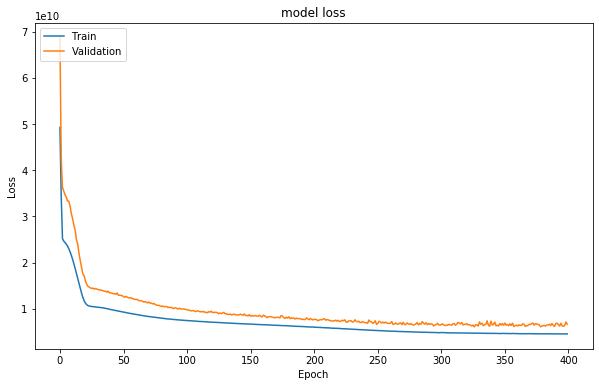

In [31]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Saving Model

In [0]:
model.save('housing_regression_model.h5')

Saved Model can be loaded later using:


```
from keras.models import load_model
model=load_model('housing_regression_model.h5')
```



In [0]:
from keras.models import load_model
model=load_model('housing_regression_final.h5')

In [0]:
datasetTest = pd.read_csv("sample_data/california_housing_test.csv")
X_test = dataset.iloc[:,:-1]
Y_test = dataset.iloc[:,-1]

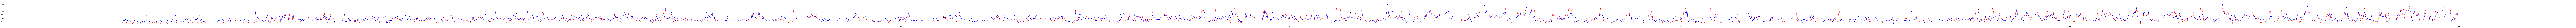

In [38]:
plt.rcParams['figure.figsize'] = [500, 5]

plt.plot(Y_test[0:3000],'--',color='red')
plt.plot(model.predict(X_test[0:3000]),'-',color='blue')
plt.show()


MODEL WEIGHTS

In [69]:
model.weights[2].shape

TensorShape([12, 8])